In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
file=pd.read_csv(r"D:\city_hour.csv")
file

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


In [ ]:
file.isnull()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,True
1,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,True
2,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,True
3,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
4,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False
707871,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
707872,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
707873,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False


In [ ]:
file = file.dropna()

In [ ]:
file.isnull()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
50888,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
50889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
50890,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
50893,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
50894,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707863,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
707864,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
707865,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
707866,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
x = file.iloc[:, 1:-2]  #enables us to select a particular cell of the dataset->leaving last 2
y = file.iloc[:, 14:15] #only the 13th col
y

,AQI
50888,155.0
50889,159.0
50890,173.0
50893,191.0
50894,191.0
...,...
707863,50.0
707864,51.0
707865,51.0
707866,51.0


In [ ]:
df_x, df_x1, df_y, df_y1 = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
df_x.head()

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
289275,2020-01-12 16:00:00,93.58,163.96,18.57,45.82,42.00,41.39,0.89,8.06,64.93,2.35,12.81,0.26
396652,2020-05-23 06:00:00,48.10,140.65,5.41,44.50,27.18,24.59,0.72,18.45,18.37,5.22,49.32,4.18
184326,2020-02-09 08:00:00,48.09,81.85,21.12,8.08,19.50,15.57,0.62,7.08,2.19,5.10,0.19,0.70
371815,2017-07-23 09:00:00,11.25,57.83,1.73,8.95,3.08,3.85,0.14,3.03,24.83,0.00,0.30,0.02
287953,2019-11-18 14:00:00,52.01,105.41,8.50,25.56,22.11,28.19,0.85,9.46,58.29,2.10,14.04,0.11


In [ ]:
df_x1.head()

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
185024,2020-03-09 10:00:00,16.08,42.54,3.01,23.91,15.29,64.64,0.38,8.48,14.23,3.02,1.81,0.85
688199,2018-04-03 05:00:00,17.25,44.25,5.62,23.48,17.03,7.77,0.32,3.45,21.48,1.08,1.83,0.33
701188,2019-09-26 10:00:00,39.00,71.25,30.80,52.50,52.95,5.33,1.44,21.90,15.95,9.25,20.27,10.95
291304,2020-04-06 05:00:00,91.22,139.41,9.33,25.12,23.29,29.82,1.08,20.64,33.03,3.00,16.77,0.17
68812,2019-12-12 05:00:00,29.50,53.50,1.53,16.40,9.95,12.90,0.58,4.62,21.62,0.82,17.43,0.10


In [ ]:
df_y.head()

,AQI
289275,363.0
396652,120.0
184326,102.0
371815,83.0
287953,247.0


In [ ]:
df_y1.head()

,AQI
185024,44.0
688199,69.0
701188,101.0
291304,134.0
68812,69.0


In [ ]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103421 entries, 289275 to 696977
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  103421 non-null  object 
 1   PM2.5     103421 non-null  float64
 2   PM10      103421 non-null  float64
 3   NO        103421 non-null  float64
 4   NO2       103421 non-null  float64
 5   NOx       103421 non-null  float64
 6   NH3       103421 non-null  float64
 7   CO        103421 non-null  float64
 8   SO2       103421 non-null  float64
 9   O3        103421 non-null  float64
 10  Benzene   103421 non-null  float64
 11  Toluene   103421 non-null  float64
 12  Xylene    103421 non-null  float64
dtypes: float64(12), object(1)
memory usage: 11.0+ MB


In [ ]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103421 entries, 289275 to 696977
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AQI     103421 non-null  float64
dtypes: float64(1)
memory usage: 1.6 MB


In [ ]:
df_x1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25856 entries, 185024 to 373968
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  25856 non-null  object 
 1   PM2.5     25856 non-null  float64
 2   PM10      25856 non-null  float64
 3   NO        25856 non-null  float64
 4   NO2       25856 non-null  float64
 5   NOx       25856 non-null  float64
 6   NH3       25856 non-null  float64
 7   CO        25856 non-null  float64
 8   SO2       25856 non-null  float64
 9   O3        25856 non-null  float64
 10  Benzene   25856 non-null  float64
 11  Toluene   25856 non-null  float64
 12  Xylene    25856 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.8+ MB


In [ ]:
df_y1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25856 entries, 185024 to 373968
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AQI     25856 non-null  float64
dtypes: float64(1)
memory usage: 404.0 KB


In [ ]:
x_train = df_x.drop(['Datetime', 'SO2', 'Benzene', 'Toluene', 'Xylene'], axis = 1) #axis=1 is for columns axis =0 for rows
y_train = df_y["AQI"]
x_test = df_x1.drop(['Datetime', 'SO2', 'Benzene', 'Toluene', 'Xylene'], axis = 1)
y_test = df_y1["AQI"]

In [ ]:
x_train.head(5)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,O3
289275,93.58,163.96,18.57,45.82,42.00,41.39,0.89,64.93
396652,48.10,140.65,5.41,44.50,27.18,24.59,0.72,18.37
184326,48.09,81.85,21.12,8.08,19.50,15.57,0.62,2.19
371815,11.25,57.83,1.73,8.95,3.08,3.85,0.14,24.83
287953,52.01,105.41,8.50,25.56,22.11,28.19,0.85,58.29


In [ ]:
#feature scaling
#we need to normalize data values as ml models work more better and faster when the values are small and in sync with each other
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_x = StandardScaler()   #for standardizing the data values into standard format->normalisation of data makes mean = 0 and unit variance
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)  #scale the training data and also learn the scaling parameters of that data. The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.
x_test=sc_x.transform(x_test)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')  #kernel is a function used in SVM for helping to define decision boundaries
#rbf= radial basis function
regressor.fit(x_train,y_train)

c:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_prediction =  regressor.predict(x_test)
y_prediction

array([-0.94307092, -0.91725661, -0.51544486, ...,  1.55345289,
       -0.74429614,  0.09376677])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(y_prediction, y_test)
mae = np.mean(np.abs(y_prediction - y_test))
r2 = r2_score(y_prediction, y_test)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)



MSE: 0.1694516660019551
MAE: 0.9917415250205188
R-squared: 0.8001499133580693


In [ ]:
y_test = sc_y.inverse_transform(y_test)
y_test[:5]

array([[ 44.],
       [ 69.],
       [101.],
       [134.],
       [ 69.]])

In [ ]:
y_prediction = y_prediction.reshape(-1,1)
y_prediction = sc_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[ 53.87946652],
       [ 56.37769681],
       [ 95.26381581],
       [166.57033085],
       [ 65.76418664]])

In [ ]:
y_test[0:10]

array([[ 44.],
       [ 69.],
       [101.],
       [134.],
       [ 69.],
       [ 44.],
       [117.],
       [ 62.],
       [ 81.],
       [ 48.]])

In [ ]:
import matplotlib.pyplot as plt

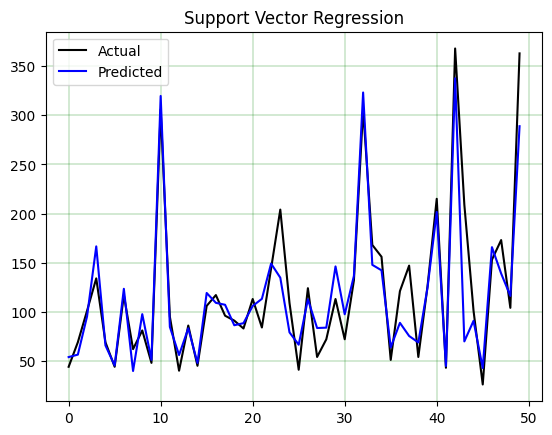

<Figure size 1200x800 with 0 Axes>

In [ ]:
y_test_array = y_test[:50]
y_pred_SVR = y_prediction[:50]
df1 = pd.DataFrame({'Actual': y_test_array.ravel(), 'Predicted': y_pred_SVR.ravel()})
df1.plot(kind='line', color=['black', 'blue'])
plt.title("Support Vector Regression")
plt.grid(which='major', linestyle='-', linewidth='0.25', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.25', color='black')
plt.figure(figsize=(12, 8))
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test_array.ravel()
result["PREDICTED AQI"] = y_pred_SVR
result["DIFFERENCE"] = result["PREDICTED AQI"] - result["ACTUAL AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["PREDICTED AQI"] - result["ACTUAL AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(10)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,44.0,53.879467,9.879467,22.453333
1,69.0,56.377697,-12.622303,18.293193
2,101.0,95.263816,-5.736184,5.679390
3,134.0,166.570331,32.570331,24.306217
4,69.0,65.764187,-3.235813,4.689585
5,44.0,45.293344,1.293344,2.939418
6,117.0,123.389922,6.389922,5.461472
7,62.0,39.735232,-22.264768,35.910916
8,81.0,97.604188,16.604188,20.498997
9,48.0,51.081557,3.081557,6.419910


In [ ]:
import pickle
with open('model3.pkl', 'wb') as f:
    pickle.dump(regressor, f)

In [ ]:
with open('model3.pkl', 'rb') as f:
    regressor = pickle.load(f)